##### Copyright 2018 The TensorFlow Authors.

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

You can upload files to your Colab environment using the files tab on the left sidebar.

1. Click the folder icon on the left sidebar to open the file browser.
2. Click the "Upload to session storage" icon (it looks like a paper with an arrow pointing up) and select your `earthquake_data_tsunami.csv` file.

Note that files uploaded this way will be deleted when your runtime is recycled. For more permanent storage, you can mount your Google Drive.

In [ ]:
pip install pandas

In [ ]:
import pandas as pd

In [ ]:
data = {
    "Date": [
        "2023-01-14", "2023-02-10", "2023-03-05", "2023-04-20", "2023-05-18",
        "2023-06-25", "2023-07-11", "2023-08-02", "2023-09-09", "2023-10-13",
        "2023-11-07", "2023-12-21"
    ],
    "Location": [
        "Japan", "Chile", "Indonesia", "Alaska", "Philippines",
        "Mexico", "New Zealand", "Peru", "Greece", "India",
        "Turkey", "Fiji"
         ],
    "Magnitude": [7.8, 6.5, 8.1, 7.3, 6.8, 7.0, 6.2, 7.6, 5.9, 6.4, 7.9, 8.3],
    "Depth_km": [30, 50, 20, 80, 40, 60, 35, 25, 15, 45, 10, 33],
    "Tsunami": [1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1],
    "Fatalities": [250, 15, 1200, 5, 340, 20, 8, 220, 3, 10, 430, 890],
    "Damage_MillionUSD": [1200, 80, 2500, 60, 700, 90, 20, 400, 15, 40, 1300, 2000]
}

df = pd.DataFrame(data)
print(df)

          Date     Location  Magnitude  Depth_km  Tsunami  Fatalities  \
0   2023-01-14        Japan        7.8        30        1         250   
1   2023-02-10        Chile        6.5        50        0          15   
2   2023-03-05    Indonesia        8.1        20        1        1200   
3   2023-04-20       Alaska        7.3        80        0           5   
4   2023-05-18  Philippines        6.8        40        1         340   
5   2023-06-25       Mexico        7.0        60        0          20   
6   2023-07-11  New Zealand        6.2        35        0           8   
7   2023-08-02         Peru        7.6        25        1         220   
8   2023-09-09       Greece        5.9        15        0           3   
9   2023-10-13        India        6.4        45        0          10   
10  2023-11-07       Turkey        7.9        10        1         430   
11  2023-12-21         Fiji        8.3        33        1         890   

    Damage_MillionUSD  
0                1200  
1 

In [ ]:
df[df["Tsunami"] == 1]


,Date,Location,Magnitude,Depth_km,Tsunami,Fatalities,Damage_MillionUSD
0,2023-01-14,Japan,7.8,30,1,250,1200
2,2023-03-05,Indonesia,8.1,20,1,1200,2500
4,2023-05-18,Philippines,6.8,40,1,340,700
7,2023-08-02,Peru,7.6,25,1,220,400
10,2023-11-07,Turkey,7.9,10,1,430,1300
11,2023-12-21,Fiji,8.3,33,1,890,2000


In [ ]:
df.loc[df["Fatalities"].idxmax(), "Location"]


'Indonesia'

In [ ]:
df["Damage_MillionUSD"].sum()


np.int64(8405)

In [ ]:
df[df["Magnitude"] > 7.5]


,Date,Location,Magnitude,Depth_km,Tsunami,Fatalities,Damage_MillionUSD
0,2023-01-14,Japan,7.8,30,1,250,1200
2,2023-03-05,Indonesia,8.1,20,1,1200,2500
7,2023-08-02,Peru,7.6,25,1,220,400
10,2023-11-07,Turkey,7.9,10,1,430,1300
11,2023-12-21,Fiji,8.3,33,1,890,2000


In [ ]:
df.sort_values(by="Magnitude", ascending=False)


,Date,Location,Magnitude,Depth_km,Tsunami,Fatalities,Damage_MillionUSD
11,2023-12-21,Fiji,8.3,33,1,890,2000
2,2023-03-05,Indonesia,8.1,20,1,1200,2500
10,2023-11-07,Turkey,7.9,10,1,430,1300
0,2023-01-14,Japan,7.8,30,1,250,1200
7,2023-08-02,Peru,7.6,25,1,220,400
3,2023-04-20,Alaska,7.3,80,0,5,60
5,2023-06-25,Mexico,7.0,60,0,20,90
4,2023-05-18,Philippines,6.8,40,1,340,700
1,2023-02-10,Chile,6.5,50,0,15,80
9,2023-10-13,India,6.4,45,0,10,40


In [ ]:
# Create an impact score (weighted combination)
df["Impact_Score"] = df["Fatalities"] * 0.6 + df["Damage_MillionUSD"] * 0.4

# Sort and get top 3
top3 = df.sort_values(by="Impact_Score", ascending=False).head(3)
print(top3[["Date", "Location", "Magnitude", "Fatalities", "Damage_MillionUSD", "Impact_Score"]])


          Date   Location  Magnitude  Fatalities  Damage_MillionUSD  \
2   2023-03-05  Indonesia        8.1        1200               2500   
11  2023-12-21       Fiji        8.3         890               2000   
10  2023-11-07     Turkey        7.9         430               1300   

    Impact_Score  
2         1720.0  
11        1334.0  
10         778.0  


In [ ]:
# Calculate correlation matrix
corr = df[["Magnitude", "Depth_km", "Fatalities", "Damage_MillionUSD"]].corr()

# Display correlation matrix
print(corr)


                   Magnitude  Depth_km  Fatalities  Damage_MillionUSD
Magnitude           1.000000 -0.195051    0.754507           0.823807
Depth_km           -0.195051  1.000000   -0.442018          -0.480342
Fatalities          0.754507 -0.442018    1.000000           0.968679
Damage_MillionUSD   0.823807 -0.480342    0.968679           1.000000


In [ ]:
# Convert Date to datetime
df["Date"] = pd.to_datetime(df["Date"])

# Extract month name
df["Month"] = df["Date"].dt.month_name()

# Group by month and sum damages
monthly_damage = df.groupby("Month")["Damage_MillionUSD"].sum().sort_values(ascending=False)

print(monthly_damage)


Month
March        2500
December     2000
November     1300
January      1200
May           700
August        400
June           90
February       80
April          60
October        40
July           20
September      15
Name: Damage_MillionUSD, dtype: int64


In [ ]:
# Group by Tsunami and compute mean fatalities and damage
impact_comparison = df.groupby("Tsunami")[["Fatalities", "Damage_MillionUSD"]].mean()

print(impact_comparison)


         Fatalities  Damage_MillionUSD
Tsunami                               
0         10.166667          50.833333
1        555.000000        1350.000000


In [ ]:
high_risk = df[(df["Magnitude"] > 7.5) & (df["Fatalities"] > 300)]
print(high_risk[["Location", "Magnitude", "Fatalities", "Damage_MillionUSD"]])


     Location  Magnitude  Fatalities  Damage_MillionUSD
2   Indonesia        8.1        1200               2500
10     Turkey        7.9         430               1300
11       Fiji        8.3         890               2000


In [ ]:
median_values = df.groupby("Tsunami")[["Magnitude", "Fatalities"]].median()
print(median_values)


         Magnitude  Fatalities
Tsunami                       
0             6.45         9.0
1             7.85       385.0


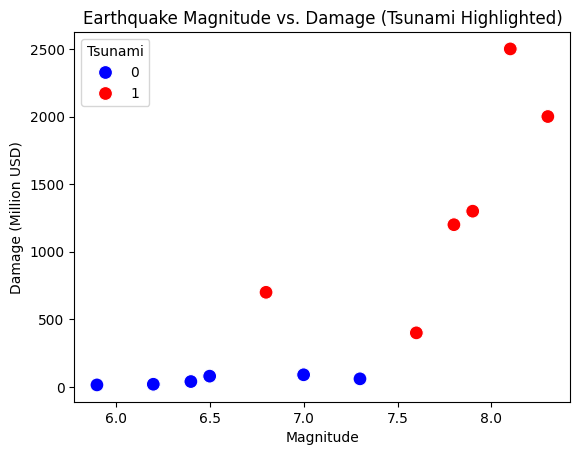

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(
    data=df,
    x="Magnitude",
    y="Damage_MillionUSD",
    hue="Tsunami",
    palette={0: "blue", 1: "red"},
    s=100
)
plt.title("Earthquake Magnitude vs. Damage (Tsunami Highlighted)")
plt.xlabel("Magnitude")
plt.ylabel("Damage (Million USD)")
plt.show()


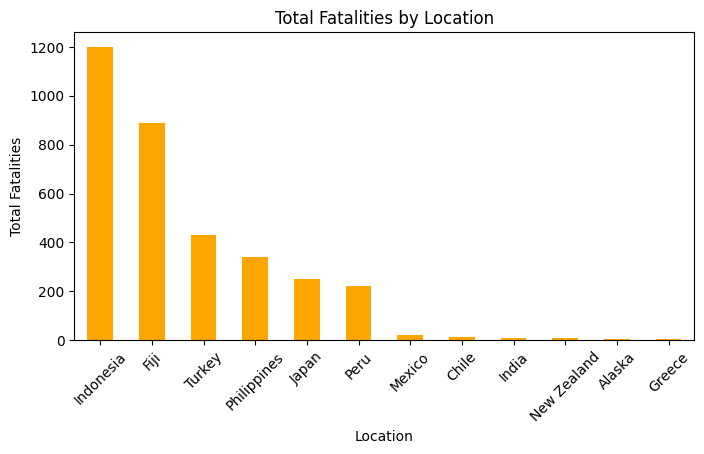

In [ ]:
fatal_by_location = df.groupby("Location")["Fatalities"].sum().sort_values(ascending=False)

fatal_by_location.plot(kind="bar", color="orange", figsize=(8,4))
plt.title("Total Fatalities by Location")
plt.xlabel("Location")
plt.ylabel("Total Fatalities")
plt.xticks(rotation=45)
plt.show()


In [ ]:
print(df.head())

        Date     Location  Magnitude  Depth_km  Tsunami  Fatalities  \
0 2023-01-14        Japan        7.8        30        1         250   
1 2023-02-10        Chile        6.5        50        0          15   
2 2023-03-05    Indonesia        8.1        20        1        1200   
3 2023-04-20       Alaska        7.3        80        0           5   
4 2023-05-18  Philippines        6.8        40        1         340   

   Damage_MillionUSD  Impact_Score     Month  
0               1200         630.0   January  
1                 80          41.0  February  
2               2500        1720.0     March  
3                 60          27.0     April  
4                700         484.0       May  


In [ ]:
df.shape

(12, 9)

In [ ]:
print(df['Date'].min())
print(df['Date'].max())

2023-01-14 00:00:00
2023-12-21 00:00:00


In [ ]:
print(df[['Magnitude','Depth_km']].describe())

       Magnitude   Depth_km
count  12.000000  12.000000
mean    7.150000  36.916667
std     0.799432  19.851532
min     5.900000  10.000000
25%     6.475000  23.750000
50%     7.150000  34.000000
75%     7.825000  46.250000
max     8.300000  80.000000


In [ ]:
print(df.groupby('Location')['Depth_km'].mean())

Location
Alaska         80.0
Chile          50.0
Fiji           33.0
Greece         15.0
India          45.0
Indonesia      20.0
Japan          30.0
Mexico         60.0
New Zealand    35.0
Peru           25.0
Philippines    40.0
Turkey         10.0
Name: Depth_km, dtype: float64


In [ ]:
df['strength'] = df['Magnitude'].apply(lambda x: 'Strong' if x > 6.5 else 'Moderate')
print(df.head())

        Date     Location  Magnitude  Depth_km  Tsunami  Fatalities  \
0 2023-01-14        Japan        7.8        30        1         250   
1 2023-02-10        Chile        6.5        50        0          15   
2 2023-03-05    Indonesia        8.1        20        1        1200   
3 2023-04-20       Alaska        7.3        80        0           5   
4 2023-05-18  Philippines        6.8        40        1         340   

   Damage_MillionUSD  Impact_Score     Month  strength  
0               1200         630.0   January    Strong  
1                 80          41.0  February  Moderate  
2               2500        1720.0     March    Strong  
3                 60          27.0     April    Strong  
4                700         484.0       May    Strong  


In [ ]:
print(df['Date'].min())
print(df['Date'].max())

2023-01-14 00:00:00
2023-12-21 00:00:00


In [ ]:
print(df.groupby('Location')['Magnitude'].max())

Location
Alaska         7.3
Chile          6.5
Fiji           8.3
Greece         5.9
India          6.4
Indonesia      8.1
Japan          7.8
Mexico         7.0
New Zealand    6.2
Peru           7.6
Philippines    6.8
Turkey         7.9
Name: Magnitude, dtype: float64


In [ ]:
print(df['Location'].value_counts())

Location
Japan          1
Chile          1
Indonesia      1
Alaska         1
Philippines    1
Mexico         1
New Zealand    1
Peru           1
Greece         1
India          1
Turkey         1
Fiji           1
Name: count, dtype: int64


In [ ]:
print(df.isnull().sum())

Date                 0
Location             0
Magnitude            0
Depth_km             0
Tsunami              0
Fatalities           0
Damage_MillionUSD    0
Impact_Score         0
Month                0
strength             0
dtype: int64


In [ ]:
print(df[df['Tsunami'] == 1]['Magnitude'].mean())

7.75


In [ ]:
df = df.drop(columns=['Tsunami'])
print(df.head())

        Date     Location  Magnitude  Depth_km  Fatalities  Damage_MillionUSD  \
0 2023-01-14        Japan        7.8        30         250               1200   
1 2023-02-10        Chile        6.5        50          15                 80   
2 2023-03-05    Indonesia        8.1        20        1200               2500   
3 2023-04-20       Alaska        7.3        80           5                 60   
4 2023-05-18  Philippines        6.8        40         340                700   

   Impact_Score     Month  strength  
0         630.0   January    Strong  
1          41.0  February  Moderate  
2        1720.0     March    Strong  
3          27.0     April    Strong  
4         484.0       May    Strong  


In [ ]:
df = df.rename(columns={'Depth_km':'Depth'})
print(df.head())

        Date     Location  Magnitude  Depth  Fatalities  Damage_MillionUSD  \
0 2023-01-14        Japan        7.8     30         250               1200   
1 2023-02-10        Chile        6.5     50          15                 80   
2 2023-03-05    Indonesia        8.1     20        1200               2500   
3 2023-04-20       Alaska        7.3     80           5                 60   
4 2023-05-18  Philippines        6.8     40         340                700   

   Impact_Score     Month  strength  
0         630.0   January    Strong  
1          41.0  February  Moderate  
2        1720.0     March    Strong  
3          27.0     April    Strong  
4         484.0       May    Strong  


In [ ]:
df["Date"] = pd.to_datetime(df["Date"])
df["Month"] = df["Date"].dt.month_name()

strongest_each_month = df.loc[df.groupby("Month")["Magnitude"].idxmax(), ["Month", "Location", "Magnitude"]]
print(strongest_each_month)


        Month     Location  Magnitude
3       April       Alaska        7.3
7      August         Peru        7.6
11   December         Fiji        8.3
1    February        Chile        6.5
0     January        Japan        7.8
6        July  New Zealand        6.2
5        June       Mexico        7.0
2       March    Indonesia        8.1
4         May  Philippines        6.8
10   November       Turkey        7.9
9     October        India        6.4
8   September       Greece        5.9


In [ ]:
region_map = {
    "Japan": "Asia",
    "Chile": "South America",
    "Indonesia": "Asia",
    "Alaska": "North America",
    "Philippines": "Asia",
    "Mexico": "North America",
    "New Zealand": "Oceania",
    "Peru": "South America",
    "Greece": "Europe",
    "India": "Asia",
    "Turkey": "Europe",
    "Fiji": "Oceania"
}

df["Region"] = df["Location"].map(region_map)

region_summary = df.groupby("Region")[["Fatalities", "Damage_MillionUSD"]].mean().round(2)
print(region_summary)


               Fatalities  Damage_MillionUSD
Region                                      
Asia                450.0             1110.0
Europe              216.5              657.5
North America        12.5               75.0
Oceania             449.0             1010.0
South America       117.5              240.0


In [ ]:
median_mag = df["Magnitude"].median()
df["Magnitude_Level"] = df["Magnitude"].apply(lambda x: "Above Median" if x > median_mag else "Below Median")

print(df[["Location", "Magnitude", "Magnitude_Level"]])


       Location  Magnitude Magnitude_Level
0         Japan        7.8    Above Median
1         Chile        6.5    Below Median
2     Indonesia        8.1    Above Median
3        Alaska        7.3    Above Median
4   Philippines        6.8    Below Median
5        Mexico        7.0    Below Median
6   New Zealand        6.2    Below Median
7          Peru        7.6    Above Median
8        Greece        5.9    Below Median
9         India        6.4    Below Median
10       Turkey        7.9    Above Median
11         Fiji        8.3    Above Median


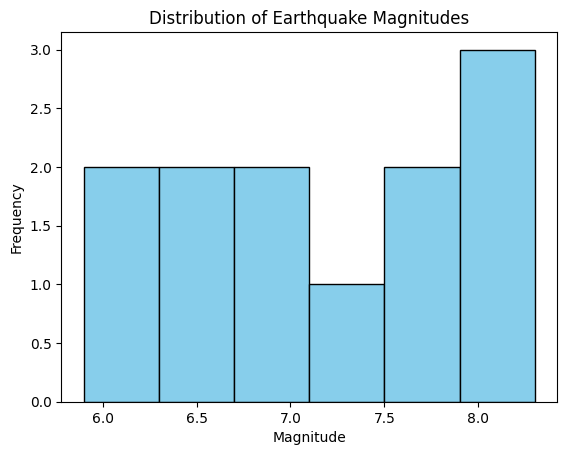

In [ ]:
plt.hist(df["Magnitude"], bins=6, color="skyblue", edgecolor="black")
plt.title("Distribution of Earthquake Magnitudes")
plt.xlabel("Magnitude")
plt.ylabel("Frequency")
plt.show()


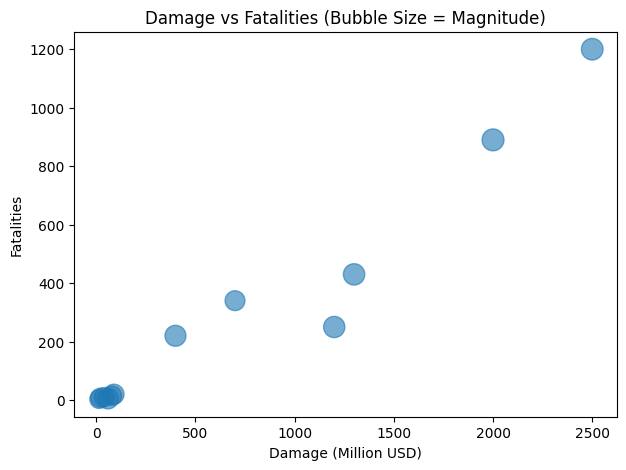

In [ ]:
plt.figure(figsize=(7,5))
plt.scatter(
    df["Damage_MillionUSD"],
    df["Fatalities"],
    s=df["Magnitude"]*30,
    alpha=0.6
)
plt.title("Damage vs Fatalities (Bubble Size = Magnitude)")
plt.xlabel("Damage (Million USD)")
plt.ylabel("Fatalities")
plt.show()

/tmp/ipython-input-1129532561.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_fatalities = df.groupby("Mag_Range")["Fatalities"].mean()


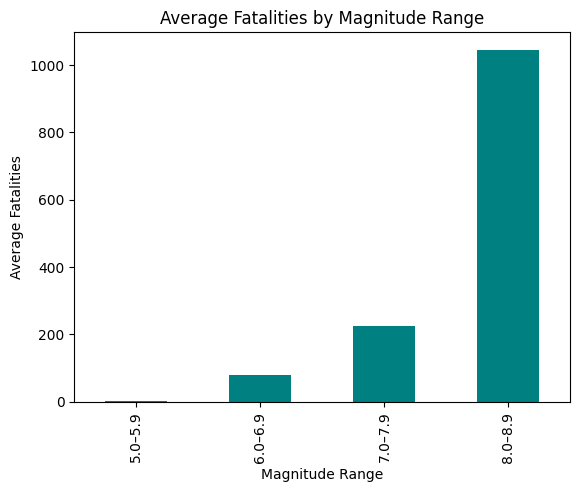

In [ ]:
bins = [5.0, 6.0, 7.0, 8.0, 9.0]
labels = ["5.0–5.9", "6.0–6.9", "7.0–7.9", "8.0–8.9"]
df["Mag_Range"] = pd.cut(df["Magnitude"], bins=bins, labels=labels)

avg_fatalities = df.groupby("Mag_Range")["Fatalities"].mean()
avg_fatalities.plot(kind="bar", color="teal", title="Average Fatalities by Magnitude Range")
plt.xlabel("Magnitude Range")
plt.ylabel("Average Fatalities")
plt.show()


In [ ]:
high_fatal_low_mag = df[(df["Fatalities"] > df["Fatalities"].mean()) & (df["Magnitude"] < df["Magnitude"].mean())]
print(high_fatal_low_mag[["Location", "Magnitude", "Fatalities"]])


      Location  Magnitude  Fatalities
4  Philippines        6.8         340


In [ ]:
contains_a = df[df["Location"].str.contains("a", case=False)]
print(contains_a[["Location", "Magnitude", "Fatalities"]])


      Location  Magnitude  Fatalities
0        Japan        7.8         250
2    Indonesia        8.1        1200
3       Alaska        7.3           5
6  New Zealand        6.2           8
9        India        6.4          10


In [ ]:
df["Location_Length"] = df["Location"].str.len()
print(df[["Location", "Location_Length"]])


       Location  Location_Length
0         Japan                5
1         Chile                5
2     Indonesia                9
3        Alaska                6
4   Philippines               11
5        Mexico                6
6   New Zealand               11
7          Peru                4
8        Greece                6
9         India                5
10       Turkey                6
11         Fiji                4


## **Introduction to Colab and Python**

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/examples/blob/master/courses/udacity_intro_to_tensorflow_for_deep_learning/l01c01_introduction_to_colab_and_python.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/examples/blob/master/courses/udacity_intro_to_tensorflow_for_deep_learning/l01c01_introduction_to_colab_and_python.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
</table>

Welcome to this Colab where you will get a quick introduction to the Python programming language and the environment used for the course's exercises: Colab.

Colab is a Python development environment that runs in the browser using Google Cloud.

For example, to print "Hello World", just hover the mouse over [ ] and press the play button to the upper left. Or press shift-enter to execute.

In [ ]:
print("Hello World")

## Functions, Conditionals, and Iteration
Let's create a Python function, and call it from a loop.

In [ ]:
def HelloWorldXY(x, y):
  if (x < 10):
    print("Hello World, x was < 10")
  elif (x < 20):
    print("Hello World, x was >= 10 but < 20")
  else:
    print("Hello World, x was >= 20")
  return x + y

for i in range(8, 25, 5):  # i=8, 13, 18, 23 (start, stop, step)
  print("--- Now running with i: {}".format(i))
  r = HelloWorldXY(i,i)
  print("Result from HelloWorld: {}".format(r))

In [ ]:
print(HelloWorldXY(1,2))

Easy, right?

If you want a loop starting at 0 to 2 (exclusive) you could do any of the following

In [ ]:
print("Iterate over the items. `range(2)` is like a list [0,1].")
for i in range(2):
  print(i)

print("Iterate over an actual list.")
for i in [0,1]:
  print(i)

print("While works")
i = 0
while i < 2:
  print(i)
  i += 1

In [ ]:
print("Python supports standard key words like continue and break")
while True:
  print("Entered while")
  break

## Numpy and lists
Python has lists built into the language.
However, we will use a library called numpy for this.
Numpy gives you lots of support functions that are useful when doing Machine Learning.

Here, you will also see an import statement. This statement makes the entire numpy package available and we can access those symbols using the abbreviated 'np' syntax.

In [ ]:
import numpy as np  # Make numpy available using np.

# Create a numpy array, and append an element
a = np.array(["Hello", "World"])
a = np.append(a, "!")
print("Current array: {}".format(a))
print("Printing each element")
for i in a:
  print(i)

print("\nPrinting each element and their index")
for i,e in enumerate(a):
  print("Index: {}, was: {}".format(i, e))

In [ ]:
print("\nShowing some basic math on arrays")
b = np.array([0,1,4,3,2])
print("Max: {}".format(np.max(b)))
print("Average: {}".format(np.average(b)))
print("Max index: {}".format(np.argmax(b)))

In [ ]:
print("\nYou can print the type of anything")
print("Type of b: {}, type of b[0]: {}".format(type(b), type(b[0])))

In [ ]:
print("\nUse numpy to create a [3,3] dimension array with random number")
c = np.random.rand(3, 3)
print(c)

In [ ]:
print("\nYou can print the dimensions of arrays")
print("Shape of a: {}".format(a.shape))
print("Shape of b: {}".format(b.shape))
print("Shape of c: {}".format(c.shape))
print("...Observe, Python uses both [0,1,2] and (0,1,2) to specify lists")

## Colab Specifics

Colab is a virtual machine you can access directly. To run commands at the VM's terminal, prefix the line with an exclamation point (!).


In [ ]:
print("\nDoing $ls on filesystem")
!ls -l
!pwd

In [ ]:
print("Install numpy")  # Just for test, numpy is actually preinstalled in all Colab instances
!pip install numpy

**Exercise**

Create a code cell underneath this text cell and add code to:


*   List the path of the current directory (pwd)
* Go to / (cd) and list the content (ls -l)

In [ ]:
!pwd
!cd /
!ls -l
print("Hello")

All usage of Colab in this course is completely free or charge. Even GPU usage is provided free of charge for some hours of usage every day.

**Using GPUs**
* Many of the exercises in the course executes more quickly by using GPU runtime: Runtime | Change runtime type | Hardware accelerator | GPU

**Some final words on Colab**
*   You execute each cell in order, you can edit & re-execute cells if you want
*   Sometimes, this could have unintended consequences. For example, if you add a dimension to an array and execute the cell multiple times, then the cells after may not work. If you encounter problem reset your environment:
  *   Runtime -> Restart runtime... Resets your Python shell
  *   Runtime -> Restart all runtimes... Will reset the Colab image, and get you back to a 100% clean environment
* You can also clear the output in the Colab by doing: Edit -> Clear all outputs
* Colabs in this course are loaded from GitHub. Save to your Google Drive if you want a copy with your code/output: File -> Save a copy in Drive...

**Learn More**
*   Check out [this](https://www.youtube.com/watch?v=inN8seMm7UI&list=PLQY2H8rRoyvwLbzbnKJ59NkZvQAW9wLbx&index=3) episode of #CodingTensorFlow, and don't forget to subscribe to the YouTube channel ;)
